In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#get iris 
from sklearn import datasets

In [2]:
import statsmodels.api as sm

iris = sm.datasets.get_rdataset('iris').data

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [109]:
iris.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [27]:
#check to see if classes are balanced
iris.groupby('Species').count().iloc[:,:1].rename(columns={'Sepal.Length': 'count'})

,count
Species,
setosa,50
versicolor,50
virginica,50


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


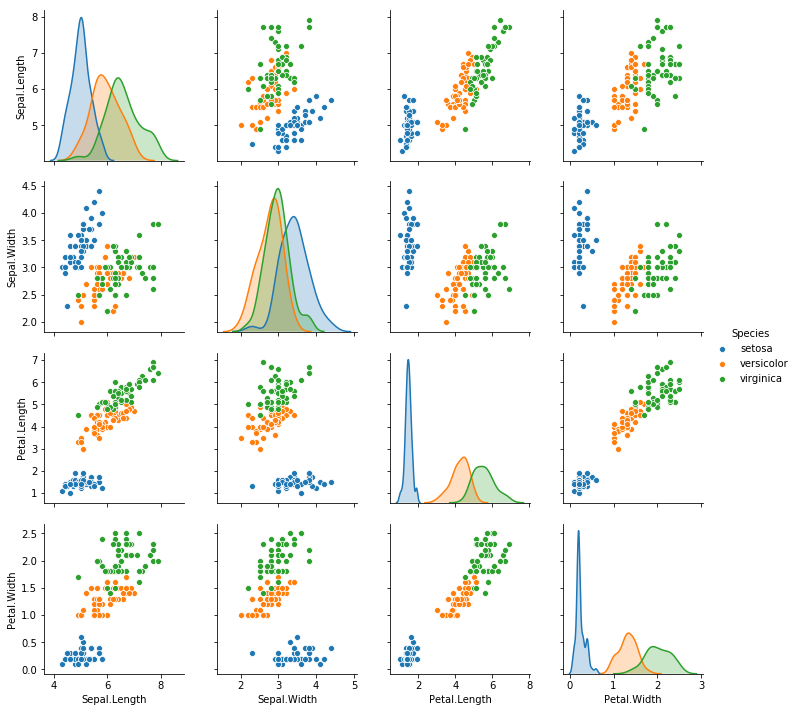

In [111]:
#visualize data
sns.pairplot(hue='Species', data=iris)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
log_model = LogisticRegression(multi_class='multinomial')

In [192]:
X = iris.drop('Species', axis=1)
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

model = LogisticRegression()
model.fit(X_train,y_train)    
y_pred = model.predict(X_test)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [211]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred).astype(float)
species_list = list(y_test.drop_duplicates().sort_values())


Text(0.5, 1.0, 'Confusion Matrix')

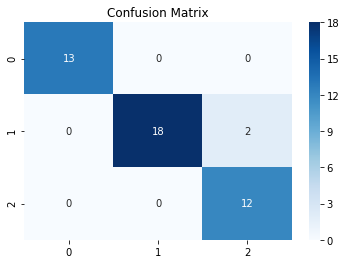

In [212]:
#confusion matrix heatmap
sns.heatmap(data=cm, annot=True, cmap='Blues').set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

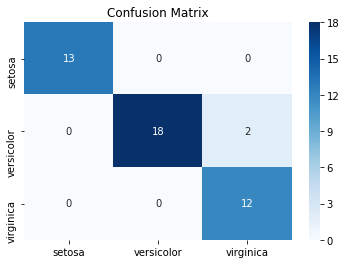

In [213]:
#confusion matrix heatmap w/ labels
sns.heatmap(data=pd.DataFrame(cm, columns=(species_list), index=(species_list)), annot=True, cmap='Blues').set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix by %')

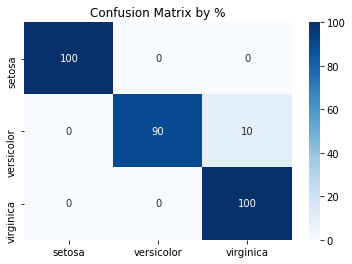

In [215]:
#confusion matrix heatmap w/ labels & %s

#convert to float so math works out in the loop
cm = cm.astype(float)

for i in range(len(cm)):
    cm[i] = cm[i]/sum(cm[i])*100

sns.heatmap(data=pd.DataFrame(cm, columns=(species_list)
            , index=(species_list))
            , annot=True, cmap='Blues', fmt='g'
            ).set_title('Confusion Matrix by %')

In [197]:
print(classification_report(y_test,y_pred))

print('-'*55 +'\nOverall Accuracy: ' + str(np.round((accuracy_score(y_test, y_pred)), 3)*100) + ' %')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.90      0.95        20
   virginica       0.86      1.00      0.92        12

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45

-------------------------------------------------------
Overall Accuracy: 95.6 %
